# Test 7 {#sec-test_7}
This test circuit shown in @fig-test_7 is a large circuit with 53 branches, 28 nodes and at least two of each element type except for Op Amps. This circuit is designed to stress the Python code with a large number of variables and unknowns. 

![test circuit](test_7.png){#fig-test_7}

The netlist generated by LTSpice:
```
* C:\users\jeff32\My Documents\Solving Electrical Engineering Problems with Python Blog\MNA Test Circuits\test_7\test_7.asc
R1 16 8 5
R2 8 1 2
R6 2 0 5
R8 11 10 8
R10 23 22 9
R11 9 8 4
R12 2 1 2
R14 10 9 10
R15 24 23 5
V1 22 0 10 AC 10
V2 1 0 2
V3 10 3 3
V4 10 20 5
I1 5 0 3
I2 2 3 1
I3 16 9 2
I4 12 18 2
R7 12 5 10
R16 3 0 6
R3 26 25 10
R4 4 3 3
F1 14 7 V2 2
E1 15 21 2 7 2
H1 4 0 V2 3
G1 11 4 13 12 2
L1 16 23 1 Rser=0
L2 25 9 4 Rser=0
V5 20 28 0
V6 23 27 0
L3 22 21 2 Rser=0
L4 17 11 5 Rser=0
C1 23 18 2
C2 12 11 2
L5 0 7 1 Rser=0
L6 9 2 2 Rser=0
F2 0 27 V2 2
E2 17 26 10 9 2
H2 27 26 V2 3
G2 16 28 0 5 2
V7 24 25 0
V8 0 6 0
R9 22 16 3
R13 15 0 5
R17 19 13 5
R18 13 6 2
R19 23 19 7
R20 20 19 5
R21 19 18 3
R22 14 13 3
R23 5 4 1
R24 20 14 3
R25 23 28 10
R5 28 0 3
;op
K1 L1 L2 0.707
K2 L3 L4 0.707
* ;.ac list 0.159154943091895
.ac dec 500 0.01 1.0
.backanno
.end
```

In [1]:
#import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Load the net list

In [2]:
net_list = '''
R1 16 8 5
R2 8 1 2
R6 2 0 5
R8 11 10 8
R10 23 22 9
R11 9 8 4
R12 2 1 2
R14 10 9 10
R15 24 23 5
V1 22 0 10 
V2 1 0 2
V3 10 3 3
V4 10 20 5
I1 5 0 3
I2 2 3 1
I3 16 9 2
I4 12 18 2
R7 12 5 10
R16 3 0 6
R3 26 25 10
R4 4 3 3
F1 14 7 V2 2
E1 15 21 2 7 2
H1 4 0 V2 3
G1 11 4 13 12 2
L1 16 23 1 
L2 25 9 4 
V5 20 28 0
V6 23 27 0
L3 22 21 2 
L4 17 11 5 
C1 23 18 2
C2 12 11 2
L5 0 7 1 
L6 9 2 2 
F2 0 27 V2 2
E2 17 26 10 9 2
H2 27 26 V2 3
G2 16 28 0 5 2
V7 24 25 0
V8 0 6 0
R9 22 16 3
R13 15 0 5
R17 19 13 5
R18 13 6 2
R19 23 19 7
R20 20 19 5
R21 19 18 3
R22 14 13 3
R23 5 4 1
R24 20 14 3
R25 23 28 10
R5 28 0 3
K1 L1 L2 0.707
K2 L3 L4 0.707
'''

## Call the symbolic modified nodal analysis function

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

Display the equations

In [4]:
# reform X and Z into Matrix type for printing
Xp = Matrix(X)
Zp = Matrix(Z)
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*Xp)[i:i+1][0],Zp[i])))

Markdown(temp)

$I_{V2} + v_{1} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{12}}\right) - \frac{v_{8}}{R_{2}} - \frac{v_{2}}{R_{12}} = 0$<br>$- I_{L6} + v_{2} \cdot \left(\frac{1}{R_{6}} + \frac{1}{R_{12}}\right) - \frac{v_{1}}{R_{12}} = - I_{2}$<br>$- I_{V3} + v_{3} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{16}}\right) - \frac{v_{4}}{R_{4}} = I_{2}$<br>$I_{H1} + g_{1} v_{12} - g_{1} v_{13} + v_{4} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{23}}\right) - \frac{v_{3}}{R_{4}} - \frac{v_{5}}{R_{23}} = 0$<br>$v_{5} \cdot \left(\frac{1}{R_{7}} + \frac{1}{R_{23}}\right) - \frac{v_{12}}{R_{7}} - \frac{v_{4}}{R_{23}} = - I_{1}$<br>$- I_{V8} - \frac{v_{13}}{R_{18}} + \frac{v_{6}}{R_{18}} = 0$<br>$- I_{F1} - I_{L5} = 0$<br>$v_{8} \cdot \left(\frac{1}{R_{2}} + \frac{1}{R_{11}} + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{2}} - \frac{v_{9}}{R_{11}} - \frac{v_{16}}{R_{1}} = 0$<br>$- I_{L2} + I_{L6} + v_{9} \cdot \left(\frac{1}{R_{14}} + \frac{1}{R_{11}}\right) - \frac{v_{10}}{R_{14}} - \frac{v_{8}}{R_{11}} = I_{3}$<br>$I_{V3} + I_{V4} + v_{10} \cdot \left(\frac{1}{R_{8}} + \frac{1}{R_{14}}\right) - \frac{v_{11}}{R_{8}} - \frac{v_{9}}{R_{14}} = 0$<br>$- I_{L4} + g_{1} v_{13} + v_{11} \left(C_{2} s + \frac{1}{R_{8}}\right) + v_{12} \left(- C_{2} s - g_{1}\right) - \frac{v_{10}}{R_{8}} = 0$<br>$- C_{2} s v_{11} + v_{12} \left(C_{2} s + \frac{1}{R_{7}}\right) - \frac{v_{5}}{R_{7}} = - I_{4}$<br>$v_{13} \cdot \left(\frac{1}{R_{22}} + \frac{1}{R_{18}} + \frac{1}{R_{17}}\right) - \frac{v_{14}}{R_{22}} - \frac{v_{6}}{R_{18}} - \frac{v_{19}}{R_{17}} = 0$<br>$I_{F1} + v_{14} \cdot \left(\frac{1}{R_{24}} + \frac{1}{R_{22}}\right) - \frac{v_{20}}{R_{24}} - \frac{v_{13}}{R_{22}} = 0$<br>$I_{Ea1} + \frac{v_{15}}{R_{13}} = 0$<br>$I_{L1} - g_{2} v_{5} + v_{16} \cdot \left(\frac{1}{R_{9}} + \frac{1}{R_{1}}\right) - \frac{v_{22}}{R_{9}} - \frac{v_{8}}{R_{1}} = - I_{3}$<br>$I_{Ea2} + I_{L4} = 0$<br>$- C_{1} s v_{23} + v_{18} \left(C_{1} s + \frac{1}{R_{21}}\right) - \frac{v_{19}}{R_{21}} = I_{4}$<br>$v_{19} \cdot \left(\frac{1}{R_{21}} + \frac{1}{R_{20}} + \frac{1}{R_{19}} + \frac{1}{R_{17}}\right) - \frac{v_{18}}{R_{21}} - \frac{v_{20}}{R_{20}} - \frac{v_{23}}{R_{19}} - \frac{v_{13}}{R_{17}} = 0$<br>$- I_{V4} + I_{V5} + v_{20} \cdot \left(\frac{1}{R_{24}} + \frac{1}{R_{20}}\right) - \frac{v_{14}}{R_{24}} - \frac{v_{19}}{R_{20}} = 0$<br>$- I_{Ea1} - I_{L3} = 0$<br>$I_{L3} + I_{V1} + v_{22} \cdot \left(\frac{1}{R_{9}} + \frac{1}{R_{10}}\right) - \frac{v_{16}}{R_{9}} - \frac{v_{23}}{R_{10}} = 0$<br>$- C_{1} s v_{18} - I_{L1} + I_{V6} + v_{23} \left(C_{1} s + \frac{1}{R_{25}} + \frac{1}{R_{19}} + \frac{1}{R_{15}} + \frac{1}{R_{10}}\right) - \frac{v_{28}}{R_{25}} - \frac{v_{19}}{R_{19}} - \frac{v_{24}}{R_{15}} - \frac{v_{22}}{R_{10}} = 0$<br>$I_{V7} - \frac{v_{23}}{R_{15}} + \frac{v_{24}}{R_{15}} = 0$<br>$I_{L2} - I_{V7} + \frac{v_{25}}{R_{3}} - \frac{v_{26}}{R_{3}} = 0$<br>$- I_{Ea2} - I_{H2} - \frac{v_{25}}{R_{3}} + \frac{v_{26}}{R_{3}} = 0$<br>$- I_{F2} + I_{H2} - I_{V6} = 0$<br>$- I_{V5} + g_{2} v_{5} + v_{28} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{25}}\right) - \frac{v_{23}}{R_{25}} = 0$<br>$v_{22} = V_{1}$<br>$v_{1} = V_{2}$<br>$v_{10} - v_{3} = V_{3}$<br>$v_{10} - v_{20} = V_{4}$<br>$v_{20} - v_{28} = V_{5}$<br>$v_{23} - v_{27} = V_{6}$<br>$v_{24} - v_{25} = V_{7}$<br>$- v_{6} = V_{8}$<br>$I_{F1} - I_{V2} f_{1} = 0$<br>$- ea_{1} v_{2} + ea_{1} v_{7} + v_{15} - v_{21} = 0$<br>$- I_{V2} h_{1} + v_{4} = 0$<br>$- I_{L1} L_{1} s - I_{L2} M_{1} s + v_{16} - v_{23} = 0$<br>$- I_{L1} M_{1} s - I_{L2} L_{2} s + v_{25} - v_{9} = 0$<br>$- I_{L3} L_{3} s - I_{L4} M_{2} s - v_{21} + v_{22} = 0$<br>$- I_{L3} M_{2} s - I_{L4} L_{4} s - v_{11} + v_{17} = 0$<br>$- I_{L5} L_{5} s - v_{7} = 0$<br>$- I_{L6} L_{6} s - v_{2} + v_{9} = 0$<br>$I_{F2} - I_{V2} f_{2} = 0$<br>$- ea_{2} v_{10} + ea_{2} v_{9} + v_{17} - v_{26} = 0$<br>$- I_{V2} h_{2} - v_{26} + v_{27} = 0$<br>

### Netlist statistics

In [5]:
print(report)

Net list report
number of lines in netlist: 55
number of branches: 53
number of nodes: 28
number of unknown currents: 20
number of RLC (passive components): 33
number of inductors: 6
number of independent voltage sources: 8
number of independent current sources: 4
number of op amps: 0
number of E - VCVS: 2
number of G - VCCS: 2
number of F - CCCS: 2
number of H - CCVS: 2
number of K - Coupled inductors: 2



### Connectivity Matrix

In [6]:
A

⎡1     1     -1                                                   -1          
⎢── + ───    ───        0         0         0       0    0        ───         
⎢R₂   R₁₂    R₁₂                                                   R₂         
⎢                                                                             
⎢  -1      1     1                                                            
⎢  ───     ── + ───     0         0         0       0    0         0          
⎢  R₁₂     R₆   R₁₂                                                           
⎢                                                                             
⎢                    1     1     -1                                           
⎢   0         0      ── + ───    ───        0       0    0         0          
⎢                    R₄   R₁₆     R₄                                          
⎢                                                                             
⎢                      -1      1     1     -1       

### Unknown voltages and currents

In [7]:
X

### Known voltages and currents

In [8]:
Z

### Network dataframe

In [9]:
network_df

,element,p node,n node,cp node,cn node,Vout,value,Vname,Lname1,Lname2
0,V1,22,0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,V2,1,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,V3,10,3,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,V4,10,20,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,V5,20,28,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5,V6,23,27,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,V7,24,25,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,V8,0,6,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8,R1,16,8,NaN,NaN,NaN,5.0,NaN,NaN,NaN
9,R2,8,1,NaN,NaN,NaN,2.0,NaN,NaN,NaN


### Unknown current dataframe

In [10]:
i_unk_df

,element,p node,n node
0,V1,22,0
1,V2,1,0
2,V3,10,3
3,V4,10,20
4,V5,20,28
5,V6,23,27
6,V7,24,25
7,V8,0,6
8,F1,14,7
9,Ea1,15,21


### Build the network equation matrix

In [11]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)
NE_sym

⎡                                    ⎛1     1 ⎞   v₈    v₂                    
⎢                          I_V2 + v₁⋅⎜── + ───⎟ - ── - ───                    
⎢                                    ⎝R₂   R₁₂⎠   R₂   R₁₂                    
⎢                                                                             
⎢                                       ⎛1     1 ⎞    v₁                      
⎢                            -I_L6 + v₂⋅⎜── + ───⎟ - ───                      
⎢                                       ⎝R₆   R₁₂⎠   R₁₂                      
⎢                                                                             
⎢                                        ⎛1     1 ⎞   v₄                      
⎢                             -I_V3 + v₃⋅⎜── + ───⎟ - ──                      
⎢                                        ⎝R₄   R₁₆⎠   R₄                      
⎢                                                                             
⎢                                             ⎛1    

In [12]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

In [13]:
#U_sym = solve(NE_sym,X)

Display the symbolic solution

In [14]:
#temp = ''
#for i in U_sym.keys():
#    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

#Markdown(temp)

## Construct a dictionary of element values

In [15]:
element_value_keys = []
element_value_values = []

for i in range(len(network_df)):
    if network_df.iloc[i]['element'][0] == 'F' or network_df.iloc[i]['element'][0] == 'E' or network_df.iloc[i]['element'][0] == 'G' or network_df.iloc[i]['element'][0] == 'H':
        element_value_keys.append(var(network_df.iloc[i]['element'].lower()))
        element_value_values.append(network_df.iloc[i]['value'])
    else:
        element_value_keys.append(var(network_df.iloc[i]['element']))
        element_value_values.append(network_df.iloc[i]['value'])

element_values = dict(zip(element_value_keys, element_value_values))

### Mutual inductance
In the netlist, the line below specifies that L3 and L4 are connected by a magnetic circuit.
>K1 L1 L2 0.707  
K2 L3 L4 0.707  

K1 identifies the mutual inductance between in two inductors, L3 and L4. k is the coefficient of coupling. 

A coupled inductor has two or more windings that are connected by a magnetic circuit. Coupled inductors transfer energy from one winding to a different winding usually through a commonly used core. The efficiency of the magnetic coupling between both the windings is defined by the coupling factor k or by mutual inductance.

The coupling constant and the [mutual inductance](https://en.wikipedia.org/wiki/Inductance#Mutual_inductance) are related by the equation:

$k = \frac {M}{\sqrt{L_1 \times L_2}}$

Where k is the coupling coefficient and in spice the value of k can be from -1 to +1 to account for a a negative phase relation. Phase dots are drawn on the schematic to indicate the relative direction of the windings. In LTspice the phase dots are associated with the negative terminal of the winding. 

In [16]:
# calculate the coupling constant from the mutual inductance
element_values[M1] = element_values[K1]*np.sqrt(element_values[L1] *element_values[L2])
print('mutual inductance, M1 = {:.9f}'.format(element_values[M1]))

element_values[M2] = element_values[K2]*np.sqrt(element_values[L3] *element_values[L4])
print('mutual inductance, M2 = {:.9f}'.format(element_values[M2]))

mutual inductance, M1 = 1.414000000
mutual inductance, M2 = 2.235730306


In [17]:
element_values

## DC operating point
Both ?



V4 and I2 are active.

In [18]:
NE = NE_sym.subs(element_values)
NE_dc = NE.subs({s:0})
NE_dc

⎡                                    I_V2 + 1.0⋅v₁ - 0.5⋅v₂ - 0.5⋅v₈          
⎢                                                                             
⎢                                        -I_L6 - 0.5⋅v₁ + 0.7⋅v₂              
⎢                                                                             
⎢                                 -I_V3 + 0.5⋅v₃ - 0.333333333333333⋅v₄       
⎢                                                                             
⎢               I_H1 + 2.0⋅v₁₂ - 2.0⋅v₁₃ - 0.333333333333333⋅v₃ + 1.3333333333
⎢                                                                             
⎢                                         -0.1⋅v₁₂ - v₄ + 1.1⋅v₅              
⎢                                                                             
⎢                                        -I_V8 - 0.5⋅v₁₃ + 0.5⋅v₆             
⎢                                                                             
⎢                                              -I_F1

In [19]:
U_dc = solve(NE_dc,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [20]:
table_header = ['unknown', 'mag']
table_row = []

for name, value in U_dc.items():
    table_row.append([str(name),float(value)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal'),tablefmt="simple",floatfmt=('5s','.6f')))

unknown           mag
---------  ----------
v1           2.000000
v2           5.971750
v3         -10.279202
v4          13.605119
v5           8.605119
v6           0.000000
v7           0.000000
v8           7.098329
v9           5.971750
v10         -7.279202
v11        -18.854648
v12        -11.394881
v13         -7.101000
v14        -23.295220
v15         21.943500
v16         21.252375
v17        -18.854648
v18          8.136867
v19          2.136867
v20        -12.279202
v21         10.000000
v22         10.000000
v23         21.252375
v24          5.971750
v25          5.971750
v26          7.647256
v27         21.252375
v28        -12.279202
I_V1         0.612356
I_V2         4.535040
I_V3       -10.674641
I_V4        10.552805
I_V5         9.764013
I_V6        -1.761697
I_V7         3.056125
I_V8         3.550500
I_F1         9.070079
I_Ea1       -4.388700
I_H1        -4.373678
I_L1         8.628637
I_L2         3.223676
I_L3         4.388700
I_L4         7.140832
I_L5      

The node voltages and current through the sources are solved for. The Sympy generated solution matches the LTSpice results:
```
       --- Operating Point ---

V(16):	 21.2524	 voltage
V(8):	 7.09833	 voltage
V(1):	 2	 voltage
V(2):	 5.97175	 voltage
V(11):	 -18.8546	 voltage
V(10):	 -7.2792	 voltage
V(23):	 21.2524	 voltage
V(22):	 10	 voltage
V(9):	 5.97175	 voltage
V(24):	 5.97175	 voltage
V(3):	 -10.2792	 voltage
V(20):	 -12.2792	 voltage
V(5):	 8.60512	 voltage
V(12):	 -11.3949	 voltage
V(18):	 8.13687	 voltage
V(26):	 7.64726	 voltage
V(25):	 5.97175	 voltage
V(4):	 13.6051	 voltage
V(14):	 -23.2952	 voltage
V(7):	 0	 voltage
V(15):	 21.9435	 voltage
V(21):	 10	 voltage
V(13):	 -7.101	 voltage
V(28):	 -12.2792	 voltage
V(27):	 21.2524	 voltage
V(17):	 -18.8546	 voltage
V(6):	 0	 voltage
V(19):	 2.13687	 voltage
I(C1):	 2.6231e-11	 device_current
I(C2):	 1.49195e-11	 device_current
I(F1):	 9.07008	 device_current
I(F2):	 9.07008	 device_current
I(H1):	 -4.37368	 device_current
I(H2):	 7.30838	 device_current
I(L1):	 8.62864	 device_current
I(L2):	 3.22368	 device_current
I(L3):	 4.3887	 device_current
I(L4):	 7.14083	 device_current
I(L5):	 -9.07008	 device_current
I(L6):	 4.18022	 device_current
I(I1):	 3	 device_current
I(I2):	 1	 device_current
I(I3):	 2	 device_current
I(I4):	 2	 device_current
I(R1):	 2.83081	 device_current
I(R2):	 2.54916	 device_current
I(R6):	 1.19435	 device_current
I(R8):	 -1.44693	 device_current
I(R10):	 1.25026	 device_current
I(R11):	 -0.281645	 device_current
I(R12):	 1.98588	 device_current
I(R14):	 -1.3251	 device_current
I(R15):	 -3.05612	 device_current
I(R7):	 -2	 device_current
I(R16):	 -1.7132	 device_current
I(R3):	 0.167551	 device_current
I(R4):	 7.96144	 device_current
I(R9):	 -3.75079	 device_current
I(R13):	 4.3887	 device_current
I(R17):	 1.84757	 device_current
I(R18):	 -3.5505	 device_current
I(R19):	 2.73079	 device_current
I(R20):	 -2.88321	 device_current
I(R21):	 -2	 device_current
I(R22):	 -5.39807	 device_current
I(R23):	 -5	 device_current
I(R24):	 3.67201	 device_current
I(R25):	 3.35316	 device_current
I(R5):	 -4.09307	 device_current
I(G1):	 8.58776	 device_current
I(G2):	 -17.2102	 device_current
I(E1):	 -4.3887	 device_current
I(E2):	 -7.14083	 device_current
I(V1):	 0.612356	 device_current
I(V2):	 4.53504	 device_current
I(V3):	 -10.6746	 device_current
I(V4):	 10.5528	 device_current
I(V5):	 9.76401	 device_current
I(V6):	 -1.7617	 device_current
I(V7):	 3.05612	 device_current
I(V8):	 3.5505	 device_current

```
The results from LTSpice agree with the SymPy results.

### AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.
V1 is the AC source, magnitude of 10

V2, V3, V4, I1, I2, I3, I4 are DC sources and are set to zero for AC analysis.

In [21]:
element_values[V2] = 0
element_values[V3] = 0
element_values[V4] = 0
element_values[I1] = 0
element_values[I2] = 0
element_values[I3] = 0
element_values[I4] = 0

NE = NE_sym.subs(element_values)
NE_w1 = NE.subs({s:1j})
NE_w1  # display the equations

⎡                                               I_V2 + 1.0⋅v₁ - 0.5⋅v₂ - 0.5⋅v
⎢                                                                             
⎢                                                   -I_L6 - 0.5⋅v₁ + 0.7⋅v₂   
⎢                                                                             
⎢                                            -I_V3 + 0.5⋅v₃ - 0.33333333333333
⎢                                                                             
⎢                          I_H1 + 2.0⋅v₁₂ - 2.0⋅v₁₃ - 0.333333333333333⋅v₃ + 1
⎢                                                                             
⎢                                                    -0.1⋅v₁₂ - v₄ + 1.1⋅v₅   
⎢                                                                             
⎢                                                   -I_V8 - 0.5⋅v₁₃ + 0.5⋅v₆  
⎢                                                                             
⎢                                                   

In [22]:
U_w1 = solve(NE_w1,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [23]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_w1.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown          mag    phase, deg
---------  ---------  ------------
v1          0.000000    nan
v2          1.269063   -156.737432
v3          5.563110     92.699863
v4          5.822884    -82.858298
v5          5.049515    -83.161299
v6          0.000000    nan
v7          3.881923      7.141702
v8          3.734176    -63.802595
v9          2.183378   -102.275110
v10         5.563110     92.699863
v11         2.699909     95.168114
v12         2.700976    103.385120
v13         2.281731     84.349178
v14         9.719907     94.381715
v15         5.149976   -119.308730
v16        15.692738    -57.591025
v17        10.020727     70.734148
v18        12.269643    -67.106998
v19         5.029569    -61.518344
v20         5.563110     92.699863
v21         7.926685    -18.560431
v22        10.000000      0.000000
v23        12.247990    -72.779714
v24        10.615913    -41.644709
v25        10.615913    -41.644709
v26         6.594170    -63.890173
v27        12.247990    -72.779714


```
       --- AC Analysis ---

frequency:	0.159155	Hz
V(16):	mag:    15.6927 phase:    -57.591° 	voltage
V(8):	mag:    3.73418 phase:   -63.8026° 	voltage
V(1):	mag:          0 phase:          0° 	voltage
V(2):	mag:    1.26906 phase:   -156.737° 	voltage
V(11):	mag:    2.69991 phase:    95.1681° 	voltage
V(10):	mag:    5.56311 phase:    92.6999° 	voltage
V(23):	mag:     12.248 phase:   -72.7797° 	voltage
V(22):	mag:         10 phase:          0° 	voltage
V(9):	mag:    2.18338 phase:   -102.275° 	voltage
V(24):	mag:    10.6159 phase:   -41.6447° 	voltage
V(3):	mag:    5.56311 phase:    92.6999° 	voltage
V(20):	mag:    5.56311 phase:    92.6999° 	voltage
V(5):	mag:    5.04951 phase:   -83.1613° 	voltage
V(12):	mag:    2.70098 phase:    103.385° 	voltage
V(18):	mag:    12.2696 phase:    -67.107° 	voltage
V(26):	mag:    6.59417 phase:   -63.8902° 	voltage
V(25):	mag:    10.6159 phase:   -41.6447° 	voltage
V(4):	mag:    5.82288 phase:   -82.8583° 	voltage
V(14):	mag:    9.71991 phase:    94.3817° 	voltage
V(7):	mag:    3.88192 phase:     7.1417° 	voltage
V(15):	mag:    5.14998 phase:   -119.309° 	voltage
V(21):	mag:    7.92669 phase:   -18.5604° 	voltage
V(13):	mag:    2.28173 phase:    84.3492° 	voltage
V(28):	mag:    5.56311 phase:    92.6999° 	voltage
V(27):	mag:     12.248 phase:   -72.7797° 	voltage
V(17):	mag:    10.0207 phase:    70.7341° 	voltage
V(6):	mag:          0 phase:          0° 	voltage
V(19):	mag:    5.02957 phase:   -61.5183° 	voltage
I(C1):	mag:    2.42683 phase:   -70.9646° 	device_current
I(C2):	mag:   0.773901 phase:   -80.8809° 	device_current
I(F1):	mag:    3.88192 phase:   -82.8583° 	device_current
I(F2):	mag:    3.88192 phase:   -82.8583° 	device_current
I(H1):	mag:    4.02686 phase:    71.9373° 	device_current
I(H2):	mag:    1.09399 phase:   -10.2674° 	device_current
I(L1):	mag:    3.65125 phase:    -84.028° 	device_current
I(L2):	mag:    1.58969 phase:   -149.132° 	device_current
I(L3):	mag:       1.03 phase:   -119.309° 	device_current
I(L4):	mag:    1.60938 phase:   -11.0444° 	device_current
I(L5):	mag:    3.88192 phase:    97.1417° 	device_current
I(L6):	mag:   0.888344 phase:   -156.737° 	device_current
I(I1):	mag:          0 phase:          0° 	device_current
I(I2):	mag:          0 phase:          0° 	device_current
I(I3):	mag:          0 phase:          0° 	device_current
I(I4):	mag:          0 phase:          0° 	device_current
I(R1):	mag:    2.39746 phase:   -55.6595° 	device_current
I(R2):	mag:    1.86709 phase:   -63.8026° 	device_current
I(R6):	mag:   0.253813 phase:   -156.737° 	device_current
I(R8):	mag:   0.358508 phase:   -89.6236° 	device_current
I(R10):	mag:     1.4803 phase:   -118.583° 	device_current
I(R11):	mag:   0.609557 phase:    150.054° 	device_current
I(R12):	mag:   0.634531 phase:   -156.737° 	device_current
I(R14):	mag:   0.769305 phase:    88.4942° 	device_current
I(R15):	mag:    1.26686 phase:    47.1591° 	device_current
I(R7):	mag:   0.773901 phase:    99.1191° 	device_current
I(R16):	mag:   0.927185 phase:    92.6999° 	device_current
I(R3):	mag:   0.515704 phase:    167.307° 	device_current
I(R4):	mag:    3.79248 phase:   -85.0285° 	device_current
I(R9):	mag:    4.44783 phase:    83.1593° 	device_current
I(R13):	mag:       1.03 phase:   -119.309° 	device_current
I(R17):	mag:    1.40714 phase:   -72.0029° 	device_current
I(R18):	mag:    1.14087 phase:    84.3492° 	device_current
I(R19):	mag:    1.05441 phase:   -80.4269° 	device_current
I(R20):	mag:    2.06528 phase:     104.93° 	device_current
I(R21):	mag:    2.42683 phase:    109.035° 	device_current
I(R22):	mag:    2.49454 phase:    97.4264° 	device_current
I(R23):	mag:   0.773901 phase:    99.1191° 	device_current
I(R24):	mag:    1.38747 phase:   -83.3702° 	device_current
I(R25):	mag:    1.76885 phase:   -77.3024° 	device_current
I(R5):	mag:    1.85437 phase:    92.6999° 	device_current
I(G1):	mag:    1.84371 phase:   -22.7819° 	device_current
I(G2):	mag:     10.099 phase:    96.8387° 	device_current
I(E1):	mag:       1.03 phase:    60.6913° 	device_current
I(E2):	mag:    1.60938 phase:    168.956° 	device_current
I(V1):	mag:    4.87346 phase:   -98.6601° 	device_current
I(V2):	mag:    1.94096 phase:   -82.8583° 	device_current
I(V3):	mag:    4.71908 phase:    94.5253° 	device_current
I(V4):	mag:    5.84267 phase:   -86.5218° 	device_current
I(V5):	mag:    6.49005 phase:   -83.5738° 	device_current
I(V6):	mag:    3.70472 phase:    80.7758° 	device_current
I(V7):	mag:    1.26686 phase:   -132.841° 	device_current
I(V8):	mag:    1.14087 phase:   -95.6508° 	device_current
```

### AC Sweep
Looking at node 17 voltage and comparing the results with those obtained from LTSpice. The frequency sweep is from 0.01 Hz to 1 Hz.

In [24]:
NE = NE_sym.subs(element_values)
NE

⎡                                               I_V2 + 1.0⋅v₁ - 0.5⋅v₂ - 0.5⋅v
⎢                                                                             
⎢                                                   -I_L6 - 0.5⋅v₁ + 0.7⋅v₂   
⎢                                                                             
⎢                                            -I_V3 + 0.5⋅v₃ - 0.33333333333333
⎢                                                                             
⎢                          I_H1 + 2.0⋅v₁₂ - 2.0⋅v₁₃ - 0.333333333333333⋅v₃ + 1
⎢                                                                             
⎢                                                    -0.1⋅v₁₂ - v₄ + 1.1⋅v₅   
⎢                                                                             
⎢                                                   -I_V8 - 0.5⋅v₁₃ + 0.5⋅v₆  
⎢                                                                             
⎢                                                   

In [25]:
U_ac = solve(NE,X)

### Plot the voltage at node 10

In [26]:
H = U_ac[v17]

In [27]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

In [33]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 200, endpoint=True)
x = np.logspace(-2, 0, 1000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 10 voltage over the sweep range and plot along with the results obtained from SymPy.

In [34]:
fn = 'test_7.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

In [35]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

Plot the results.  
Using

> np.unwrap(2 * phase) / 2) 

to keep the pahse plots the same.

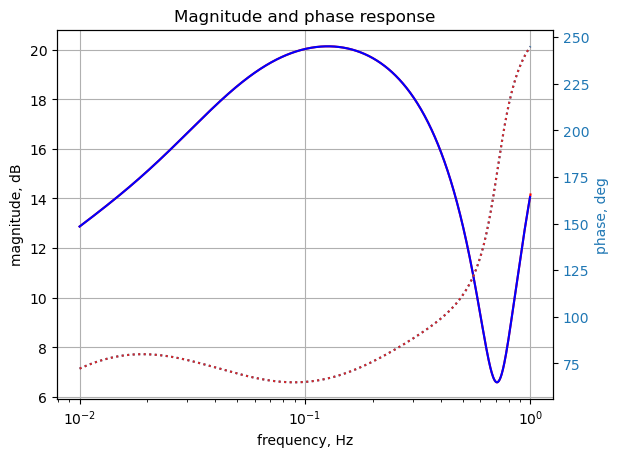

In [38]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-r')    # Bode magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.unwrap(2*np.angle(voltage)/2) *180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

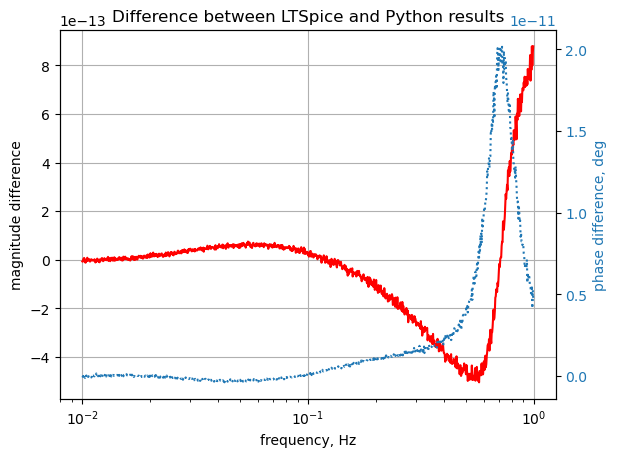

In [37]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude difference')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency[0:-1], np.abs(voltage[0:-1])-10**(mag/20),'-r')    # Bode magnitude plot
#plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(voltage[0:-1])/2) *180/np.pi - phase,':',color=color)  # Bode phase plot
#plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase difference, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Difference between LTSpice and Python results')
plt.show()

The SymPy and LTSpice results overlay each other. 